# Machine Learning Project - 2: Handwritten Letter Classification Challenge

Train a machine learning model to classify any 10 letters from one of the Indian languages. The project involves the following steps;

# 1. Collect images of handwritten letters of one of the Indian languages 
I  have collected handwritten images of 10 different alphabets of  Tamil language. Collected numerous picture of those alphabets and now we will create a model to decide if it can guess which class(the group of same letter )out alphabet belongs to.

In [1]:
import numpy as np
import pandas as pd
# import itertools

import tensorflow as tf
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# import matplotlib.image as im
import cv2

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
PIXELS = 50                    # Macro defining number of pixels
DIMENSIONS = PIXELS * PIXELS    # Defining a resolution for the sample images
TESTING_SIZE = 0.20             # By convention 20% of dataset will be used for testing

# 2. Reading each image from all the folder

In [3]:
def load_and_process_images(folder_path, label, dataset, dimensions, pixels):
    images_count = 0
    dataset_list = []

    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        cv2.imwrite(os.path.join(folder_path, filename), img)

        img_50x50 = cv2.resize(img, (pixels, pixels))
        img_instance = img_50x50.flatten()

        if dimensions != img_instance.size:
            print("image pixel error")

        dataset_list.append(img_instance)
        images_count += 1

        # plt.imshow(img_50x50, cmap='gray')
        # plt.title(f"Label: {label}, Image {images_count}")
        # plt.show()

    data_matrix = np.empty([images_count, dimensions], dtype=list)
    for i in range(images_count):
        data_matrix[i] = dataset_list[i]

    # Generating tags for the instances
    tag = np.full((images_count, 1), label, dtype=int)

    return data_matrix, tag, images_count


In [4]:
# Initialize constants
PIXELS = 50
DIMENSIONS = PIXELS * PIXELS

# Initialize datasets and counters
dataset_A, tag_A, images_of_A = load_and_process_images("Alphabet/A", 0, [], DIMENSIONS, PIXELS)
dataset_Aa, tag_Aa, images_of_Aa = load_and_process_images("Alphabet/Aa", 1, [], DIMENSIONS, PIXELS)
dataset_E, tag_E, images_of_E = load_and_process_images("Alphabet/E", 2, [], DIMENSIONS, PIXELS)
dataset_Ee, tag_Ee, images_of_Ee = load_and_process_images("Alphabet/Ee", 3, [], DIMENSIONS, PIXELS)
dataset_O, tag_O, images_of_O = load_and_process_images("Alphabet/O", 4, [], DIMENSIONS, PIXELS)
dataset_Oo, tag_Oo, images_of_Oo = load_and_process_images("Alphabet/Oo", 5, [], DIMENSIONS, PIXELS)
dataset_Ae, tag_Ae, images_of_Ae = load_and_process_images("Alphabet/Ae", 6, [], DIMENSIONS, PIXELS)
dataset_Aee, tag_Aee, images_of_Aee = load_and_process_images("Alphabet/Aee", 7, [], DIMENSIONS, PIXELS)
dataset_I, tag_I, images_of_I = load_and_process_images("Alphabet/I", 8, [], DIMENSIONS, PIXELS)
dataset_Ovv, tag_Ovv, images_of_Ovv = load_and_process_images("Alphabet/Ovv", 9, [], DIMENSIONS, PIXELS)

In [5]:
# Determining total number of image instances 
instances = images_of_A + images_of_Aa + images_of_E + images_of_Ee + images_of_O + images_of_Oo + images_of_Ae + images_of_Aee + images_of_I + images_of_Ovv

print("Total Instances in the data set:", instances)
print("Total Features or Dimension of data set:" , DIMENSIONS)

Total Instances in the data set: 1000
Total Features or Dimension of data set: 2500


In [6]:
# Stacking the individual matrices
data_matrix = np.vstack((dataset_A, dataset_Aa, dataset_E, dataset_Ee, dataset_O, dataset_Oo, dataset_Ae, dataset_Aee, dataset_I, dataset_Ovv))

# Generating the data matrix
print("My X matrix of order", data_matrix.shape, "is given as follows: ", data_matrix)


My X matrix of order (1000, 2500) is given as follows:  [[187 184 185 ... 178 179 179]
 [187 184 185 ... 178 179 179]
 [182 183 181 ... 178 175 178]
 ...
 [155 154 155 ... 150 149 151]
 [154 154 155 ... 154 153 153]
 [151 153 153 ... 151 151 152]]


In [7]:
# Generating tags for the instances
tag_A = np.full((images_of_A, 1), 0, dtype=int)
tag_Aa = np.full((images_of_Aa, 1), 1, dtype=int)
tag_E = np.full((images_of_E, 1), 2, dtype=int)
tag_Ee = np.full((images_of_Ee, 1), 3, dtype=int)
tag_O = np.full((images_of_O, 1), 4, dtype=int)
tag_Oo = np.full((images_of_Oo, 1), 5, dtype=int)
tag_Ae = np.full((images_of_Ae, 1), 6, dtype=int)
tag_Aee = np.full((images_of_Aee, 1), 7, dtype=int)
tag_I = np.full((images_of_I, 1), 8, dtype=int)
tag_Ovv = np.full((images_of_Ovv, 1), 9, dtype=int)

In [8]:
# Generating the tag vector
tag_vector = np.concatenate((tag_A, tag_Aa, tag_E, tag_Ee, tag_O, tag_Oo,tag_Ae,tag_Aee,tag_I,tag_Ovv))
print("My tags are:", tag_vector)

My tags are: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [9]:
# Converting vector to 1D array
y = np.ravel(tag_vector, order='A')
print("Shape of x:", data_matrix.shape)
print("Shape of y:", y.shape)


Shape of x: (1000, 2500)
Shape of y: (1000,)


# 3. Split the data into train and test tests (80% train and 20% test)

In [10]:
# Splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(data_matrix, y, test_size = TESTING_SIZE, shuffle=True)
X_test.shape

(200, 2500)

In [11]:
scalar = StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

In [12]:
# Apply PCA
pca = PCA(n_components=50)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scalar)
X_test_pca = pca.transform(X_test_scalar)

# 4. Train a classification model using neural networks and support vector machines on the training data

# SGDClassifier

Stochastic Gradient Descent Classifier: AUROC = 0.500
Accuracy score of Stochastic Gradient Descent Classifier 0.935
Classification report for Stochastic Gradient Descent Classifier SGDClassifier(loss='modified_huber'):
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00        26
           4       0.90      0.83      0.86        23
           5       1.00      1.00      1.00        26
           6       0.95      1.00      0.97        18
           7       0.93      0.93      0.93        15
           8       0.85      0.96      0.90        24
           9       0.86      0.75      0.80        16

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200




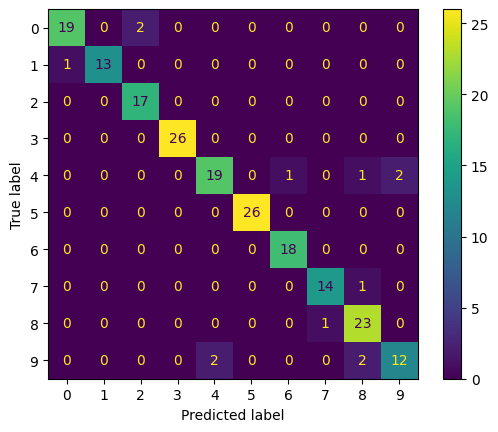

Number of unique classes in y_test: 10
Number of columns in sgdc_probs: 10


In [13]:
sgdc_model = SGDClassifier(loss='modified_huber')
sgdc_model.fit(X_train_scalar, y_train)
predictions = sgdc_model.predict(X_test_scalar)

sgdc_probs = sgdc_model.predict_proba(X_test)
sgdc_auc = roc_auc_score(y_test, sgdc_probs, multi_class='ovr')


print("Stochastic Gradient Descent Classifier: AUROC = %.3f" %(sgdc_auc))

print("Accuracy score of Stochastic Gradient Descent Classifier" , accuracy_score(y_test, predictions))
print(
    f"Classification report for Stochastic Gradient Descent Classifier {sgdc_model}:\n"
    f"{classification_report(y_test, predictions)}\n"
)
confusion_matrix1  =confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix1).plot()
plt.show()

sgdc_report = classification_report(y_test, predictions, output_dict=True)
sgdc_df = pd.DataFrame(sgdc_report).transpose()

print("Number of unique classes in y_test:", len(np.unique(y_test)))
print("Number of columns in sgdc_probs:", sgdc_probs.shape[1])

plt.show() 

# SVM CLASSIFIER


In [14]:
from sklearn.calibration import CalibratedClassifierCV

SVM Classifier: AUROC = 0.978
Accuracy score of SVM Classifier: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.75      0.86      0.80        14
           2       1.00      1.00      1.00        17
           3       1.00      0.96      0.98        26
           4       0.83      0.87      0.85        23
           5       0.89      0.92      0.91        26
           6       0.90      1.00      0.95        18
           7       0.71      1.00      0.83        15
           8       0.94      0.67      0.78        24
           9       0.40      0.25      0.31        16

    accuracy                           0.86       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.85      0.86      0.85       200



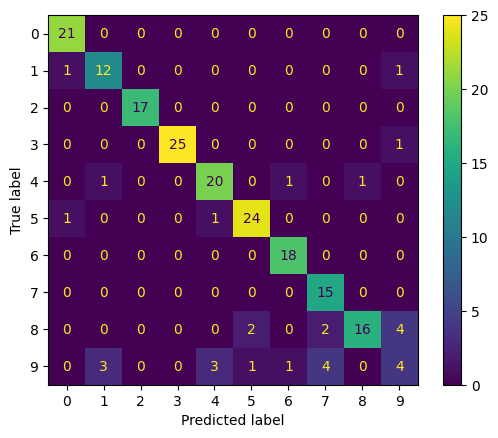

In [15]:
# SVM Classifier
svm_model = LinearSVC(max_iter=1500, multi_class='ovr', dual=False)
calibrated_svm = CalibratedClassifierCV(svm_model, method='sigmoid')
calibrated_svm.fit(X_train_pca, y_train)
svc_probs = calibrated_svm.predict_proba(X_test_pca)
svc_auc = roc_auc_score(y_test, svc_probs, multi_class='ovr')

print("SVM Classifier: AUROC = %.3f" % svc_auc)
print("Accuracy score of SVM Classifier:", accuracy_score(y_test, calibrated_svm.predict(X_test_pca)))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, calibrated_svm.predict(X_test_pca)))

# Visualization - Confusion Matrix
confusion_matrix_svm = confusion_matrix(y_test, calibrated_svm.predict(X_test_pca))
display_svm = ConfusionMatrixDisplay(confusion_matrix_svm).plot()
plt.show()

# Convolutional neural networks (CNNs)

In [16]:
from keras.utils import to_categorical

In [17]:
from keras.utils import to_categorical
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ',  X_test.shape, y_test.shape)

Training data shape :  (800, 2500) (800,)
Testing data shape :  (200, 2500) (200,)


In [18]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [19]:
X_train = X_train.reshape(-1,50,50, 1)
X_test = X_test.reshape(-1,50,50, 1)
X_train.shape, X_test.shape

((800, 50, 50, 1), (200, 50, 50, 1))


The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [20]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train = X_train /50.
X_test = X_test /50.


In the process of preparing the class labels for our problem statement, we adopt one-hot encoding, a technique that transforms categorical data into a numerical vector. 

This conversion is essential because machine learning algorithms often struggle to handle categorical data directly. One-hot encoding involves creating a binary column for each category or class, where only one column has a value of 1 for each sample. In the context of our problem, this encoding takes the form of a row vector, uniquely representing the class of each image. It's crucial to emphasize that this vector primarily comprises zeros, except for the position corresponding to the specific class the image belongs to.


In [21]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)
print(train_Y_one_hot.shape)
print(test_Y_one_hot.shape)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

(800,)
(200,)
(800, 10)
(200, 10)
Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


For the model to generalize well, split the training data into two parts, one designed for training and another one for validation. In this case, train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since ,I will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [22]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=13)

In [23]:
#Checking the shape of training and validation set.

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((640, 50, 50, 1), (160, 50, 50, 1), (640, 10), (160, 10))

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU



using a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy.Will train the network for 20 epochs.

In [25]:
batch_size = 64
epochs = 20
num_classes = 10

# 5.Fine tune the parameters to increase the classification accuracies of the model on training and test data.

In [26]:
# we added dropout layers to help in case of overfitting
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))   
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
#Compile the Model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= tf.keras.optimizers.Adam(),metrics=['accuracy'])


Visualizing the layers that were created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                        

#Train the Model


Finally,train the model with Keras' fit() function! 

The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help  to analyze model's performance visually.

In [29]:
mtrain = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20


10/10 [==============================] - 4s 189ms/step - loss: 2.5078 - accuracy: 0.1047 - val_loss: 2.3067 - val_accuracy: 0.1125
Epoch 2/20
10/10 [==============================] - 1s 145ms/step - loss: 2.2958 - accuracy: 0.1109 - val_loss: 2.2938 - val_accuracy: 0.2062
Epoch 3/20
10/10 [==============================] - 1s 149ms/step - loss: 2.2881 - accuracy: 0.1031 - val_loss: 2.2719 - val_accuracy: 0.1000
Epoch 4/20
10/10 [==============================] - 2s 154ms/step - loss: 2.1874 - accuracy: 0.1937 - val_loss: 2.0724 - val_accuracy: 0.2562
Epoch 5/20
10/10 [==============================] - 2s 153ms/step - loss: 1.8476 - accuracy: 0.3250 - val_loss: 1.4998 - val_accuracy: 0.5688
Epoch 6/20
10/10 [==============================] - 2s 153ms/step - loss: 1.3424 - accuracy: 0.5422 - val_loss: 1.0264 - val_accuracy: 0.6562
Epoch 7/20
10/10 [==============================] - 2s 153ms/step - loss: 1.0094 - accuracy: 0.6594 - val_loss: 0.7309 - val_accuracy: 0.7500
Epoc

Finally! We trained the model on Tamil handwriting for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 97% and the training loss is quite low (5.2598e-04).

Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

We addedd dropout layer to handle overfitting.

Evaluate the performance of the model on the test set before you come on to a conclusion.

# 6. Validate the model on the test data 

In [30]:
#Model Evaluation on the Test Set
test_eval = model.evaluate(X_test, test_Y_one_hot, verbose=0)


In [31]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.04856017976999283
Test accuracy: 0.9900000095367432


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark of an SVM classifier with mean accuracy of is 0.86 and benchmark of an Stochastic Gradient classifier with mean accuracy of is 0.935.

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [33]:
mtrain_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data 
                           =(valid_X, valid_label))


Epoch 1/20
10/10 [==============================] - 4s 184ms/step - loss: 0.1308 - accuracy: 0.9625 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 2/20
10/10 [==============================] - 2s 155ms/step - loss: 0.1243 - accuracy: 0.9578 - val_loss: 0.0292 - val_accuracy: 0.9937
Epoch 3/20
10/10 [==============================] - 2s 161ms/step - loss: 0.1027 - accuracy: 0.9750 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 2s 163ms/step - loss: 0.0642 - accuracy: 0.9859 - val_loss: 0.0450 - val_accuracy: 0.9750
Epoch 5/20
10/10 [==============================] - 2s 156ms/step - loss: 0.0485 - accuracy: 0.9859 - val_loss: 0.0191 - val_accuracy: 0.9937
Epoch 6/20
10/10 [==============================] - 2s 159ms/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0126 - val_accuracy: 0.9937
Epoch 7/20
10/10 [==============================] - 2s 156ms/step - loss: 0.0652 - accuracy: 0.9750 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 

In [34]:
predicted_classes = model.predict(X_test)

7/7 [==============================] - 0s 37ms/step


Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, we will round off the output which will convert the float values into an integer. Further,we  will use np.argmax() to select the index number which has a higher value in a row.


In [35]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [36]:
predicted_classes.shape, y_test.shape

((200,), (200,))

In [37]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))

Found 198 correct labels


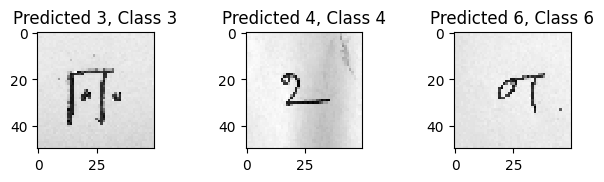

In [38]:
for i, correct in enumerate(correct[:3]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],y_test[correct]))
    plt.tight_layout()


Found 2 incorrect labels


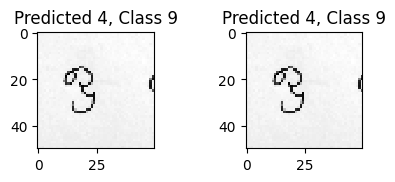

In [39]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:3]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

Examining the provided images, it's unclear why our model struggled with accurate classification. It appears that the presence of similar patterns across multiple classes may have hindered the classifier's performance, despite the robust nature of CNN architecture.

# 7. Classification Report
Classification report will help us in identifying the misclassified classes in more detail.We will be able to observe for which class the model performed bad out of the given 10 classes.

In [40]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

In [41]:
num_classes = 10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        21
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        17
     Class 3       1.00      1.00      1.00        26
     Class 4       0.92      1.00      0.96        23
     Class 5       1.00      1.00      1.00        26
     Class 6       1.00      1.00      1.00        18
     Class 7       1.00      1.00      1.00        15
     Class 8       1.00      1.00      1.00        24
     Class 9       1.00      0.88      0.93        16

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

